# Logistic regression two ways

This notebook seeks to implement logistic regression in two ways: <br>
- sci-kit learn implementation <br>
- gradient descent implementation - using numpy arrays <br>
<br>
It uses the whole of the iris dataset.

The setup for logistic regression is:
<br>

$
\begin{align}
Hypothesis: h(x) = \frac{1}{1+e^{-\sum_{j=1}^{n}\theta_jx_j}}
\end{align}
$

$
\begin{align}
Cost: J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} y^{(i)}(log(h_\theta(x^{i})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))
\end{align}
$

# Import libaries

Load the libaries needed for multiple regression

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler

# Setup chart settings

In [2]:
# plot charts automatically
%matplotlib inline
# define plot styles
sns.set(font_scale=2)
sns.set_style("darkgrid")

# Import datasets

Load and return the boston house-prices dataset (regression).

In [3]:
# import iris dataset from sklearn and create X features and y vector
iris = datasets.load_iris()
y = iris.target
X = iris.data

Scale data as this is needed for regularization and gradient descent

In [4]:
# Initiate the standard scaler: scaler
scaler = StandardScaler()
# Scale data as feature scaling makes gradient descent/ regularization converge more quickly or converge at all
X = scaler.fit_transform(X)

Check format of data

In [5]:
# check shape of the data
print(y.shape,X.shape)

(150,) (150, 4)


In [6]:
# show unique values in y
np.unique(y)

array([0, 1, 2])

Recode to create a binary classification problem from the three type of iris

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# recode y=0 (setosa) to y=1 (veriscolor and setotsa)
y[y==0]=1
# recode y=2 to y=0 (virginica)
y[y==2]=0

# Assign constants and set print conditions

Assign constants for the models

In [9]:
# assign high C for regularization term so will not sci-kit learn will not regularize
C=1e15
# assign random state
random_state=42

Set print formats so that numpy arrays do not print in scientific format

In [10]:
# Set print conditions
np.set_printoptions(suppress=True, precision=2) 

# Logistic Regression

### Sci-kit learn

In [11]:
# Create the classifier: lr
lr = linear_model.LogisticRegression(C=C)

In [12]:
# Fit the model to the data: model
model = lr.fit(X, y)

In [13]:
# Compute predictions for the features: y_pred
y_pred = model.predict(X)

In [14]:
# Compute probabilities for the features: y_prob
y_prob = model.predict_proba(X)[:,1]

In [15]:
# print intercept:
print("Intercept: ",model.intercept_)

Intercept:  [ 20.01]


In [16]:
# print coefficients:
print("Coefficients: ",model.coef_)

Coefficients:  [[  2.03   2.88 -16.53 -13.86]]


In [17]:
# print the accuracy score
print("Accuracy: ",accuracy_score(y,y_pred))

Accuracy:  0.986666666667


In [18]:
# print the logistic loss:
print("Logistic loss: ",log_loss(y,y_prob))

Logistic loss:  0.0396620542912


### Batch gradient descent

The setup for logistic regression is:
<br>

$
\begin{align}
Hypothesis: h(x) = \frac{1}{1+e^{-\sum_{j=1}^{n}\theta_jx_j}}
\end{align}
$

$
\begin{align}
Cost: J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} y^{(i)}(log(h_\theta(x^{i})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))
\end{align}
$

In [19]:
# Add column of 1s to feature matrix, which is needed for the matrix implementation of gradient descent
# this adds the intecept to the model
X = np.hstack((np.ones((X.shape[0], 1)),X))

In [20]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [21]:
# works same as predict_proba
def hypothesis(X,theta):
    hx = sigmoid(np.dot(X,theta))
    return hx

In [22]:
# define gradient function that computes the gradient for a given theta
def gradient(X,theta,y,m):
    hx = hypothesis(X,theta)
    error = hx-y
    gradient = (1./m)*np.dot(X.T,error)
    return gradient

In [23]:
# define cost function that computes the mean-squared error for given theta
def cost(X,theta,y,eps=1e-15):
    # calculate size: m
    m=y.shape[0]
    # Log loss is undefined for p=0 or p=1, so probabilities are clipped to max(eps, min(1 - eps, p)): hx
    hx = np.clip(hypothesis(X,theta),eps,1 - eps)
    # calculate cost: cost
    cost = -(1./m)*(np.dot(y.T, np.log(hx))+np.dot((1-y).T,np.log(1 - hx)))
    return cost

In [24]:
# define gradient descent function, which returns the cost and the final theta estimates for linear regression
def gradient_descent(X,y,n_iter,alpha):
    
    # initilize theta vector to zeros
    theta = np.zeros(X.shape[1])
    
    # initilize  costs vector to store results
    costs = np.zeros(n_iter)
       
    # initilize  m=the number of training examples
    m=y.shape[0]
    
    # perform batch gradient descent a maximum of n_iter times
    for i in range(n_iter):
        #Save old theta
        theta_old = theta     
        
        # Perform batch update of theta using gradient descent
        theta = theta - alpha*gradient(X,theta,y,m)
        
        # Update costs vector with cost for new theta
        costs[i]=cost(X,theta,y)
        
        # stopping criteria: stop if the norm of the difference in theta is less than 0.000001
        epsilon = np.linalg.norm(theta-theta_old, ord=1)
        if epsilon<0.000001:
            # delete any unused space from vector before stopping
            costs = np.delete(costs, range(i+1, n_iter), None)
            break             
                      
        # Divergence test: if the costs start increasing by more than 1 stop and print error
        if i>0:
            diff = costs[i-1]-costs[i]
            if(diff<-1):
                raise ValueError('Gradient descent is diverging choose a smaller alpha')
                
        # Print message if didn't converge in number of iterations
        if i+1 == n_iter:
            print('Model did not fully convege try picking a higher number of iterations (n_iter) or learning rate (alpha)')
            
    #return the cost vector and theta
    return theta, costs

In [25]:
# perform gradient descent
theta_grad, cost_grad = gradient_descent(X,y,n_iter=100000,alpha=2)

In [26]:
# print intercept:
print("Intercept: ",theta_grad[0])

Intercept:  20.0803584548


In [27]:
# print coefficients
print("Coefficients: ",theta_grad[1:])

Coefficients:  [  2.03   2.89 -16.58 -13.91]


In [28]:
# make predictions if hypothesis>=0.5 then predict 1, else 0: y_pred_grad
y_pred_grad = (hypothesis(X, theta_grad)>=0.5).astype(int)
# evaluate accuracy and print
print("Accuracy: ", np.mean(y_pred_grad==y))

Accuracy:  0.986666666667


In [29]:
# print the log loss: cost
print("Cost: ",cost(X,theta_grad,y))

Cost:  0.0396618236377


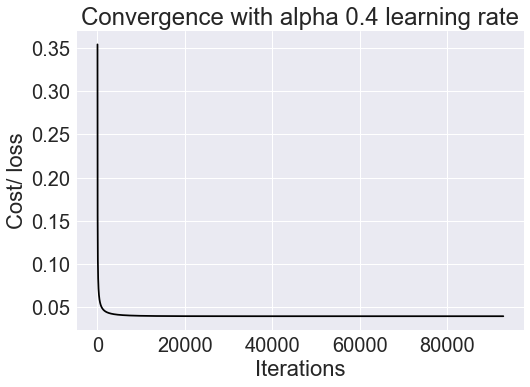

In [30]:
# Plot cost compared to number of iterations
plt.title("Convergence with alpha 0.4 learning rate");
plt.plot(cost_grad,color='black', label="0.3");
plt.ylabel('Cost/ loss');
plt.xlabel('Iterations');

# Compare cost/loss of the methods

In [31]:
print("Log loss/ cost for sci-kit learn: ",log_loss(y,y_prob))
print("Log loss/ cost for gradient descent: ",cost_grad[-1])

Log loss/ cost for sci-kit learn:  0.0396620542912
Log loss/ cost for gradient descent:  0.0396618236377


# Compare accuracy of the methods

In [32]:
print("Accuracy for sci-kit learn: ",accuracy_score(y,y_pred))
print("Accuracy for gradient descent: ", np.mean(y_pred_grad==y))

Accuracy for sci-kit learn:  0.986666666667
Accuracy for gradient descent:  0.986666666667
